# Sınıflandırma Modelleri

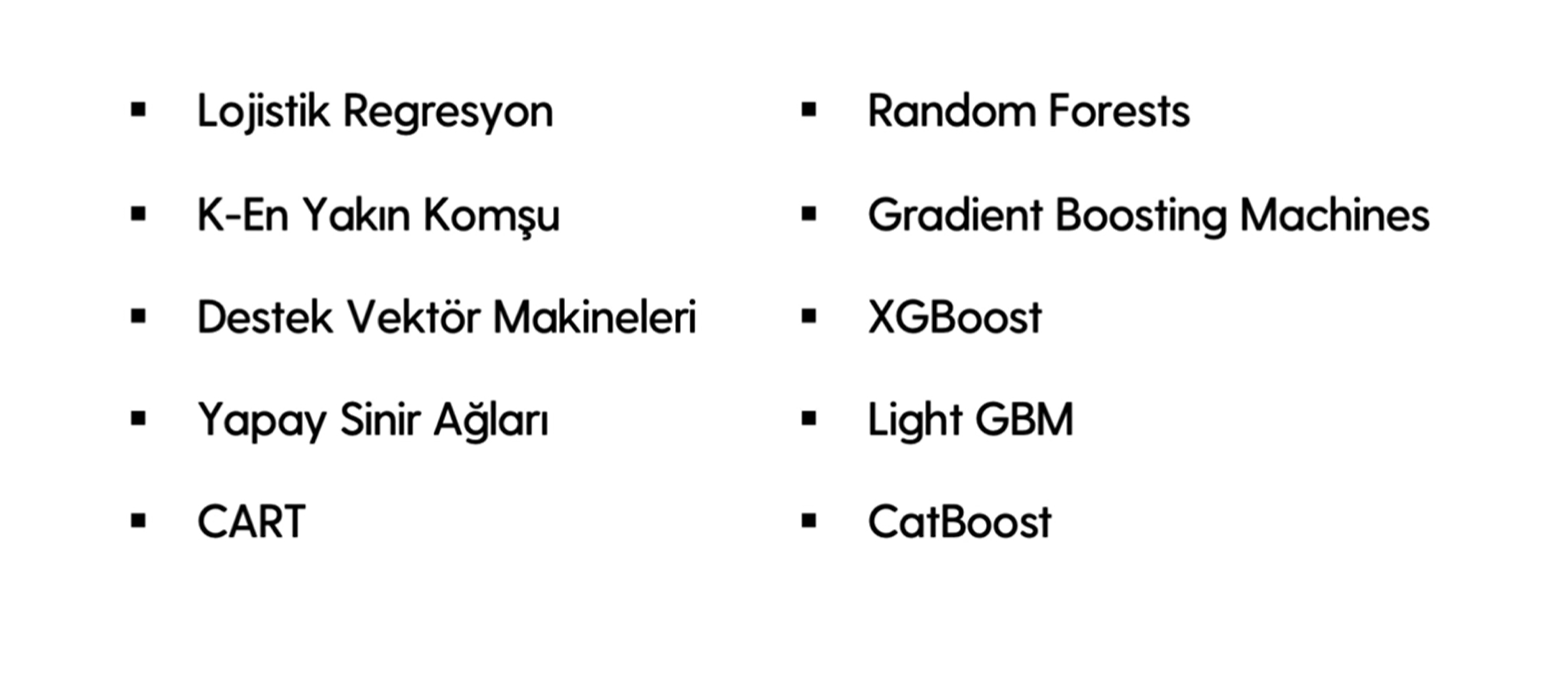

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier  # Yapay Sinir Ağları
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

* "warnings" fonksiyonu eski sürüm uyarılarını göstermmemeye yaramaktadır.

# Veri Setimiz: Şeker Hastalığı 

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Lojistik Regresyon

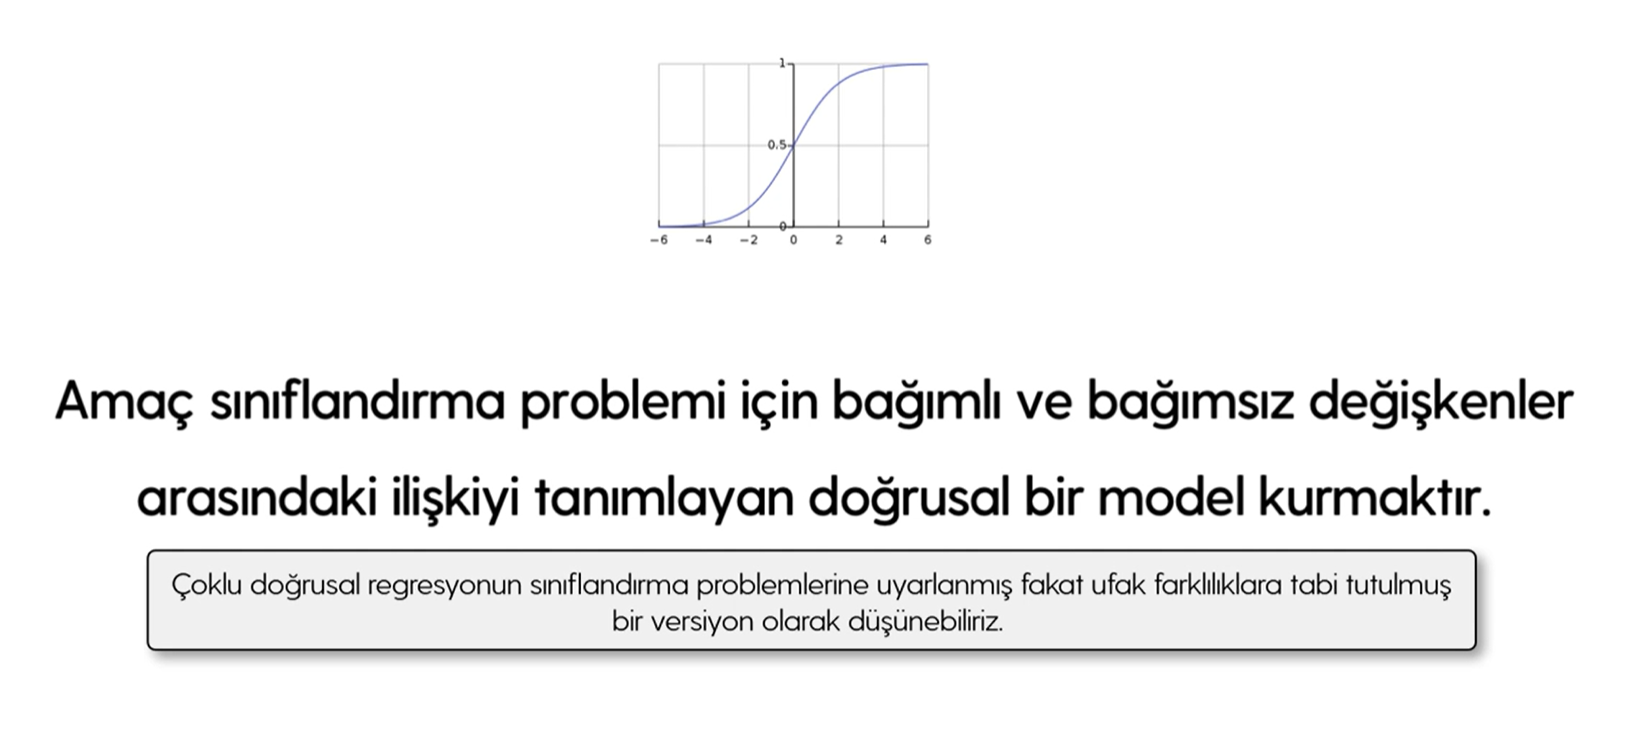

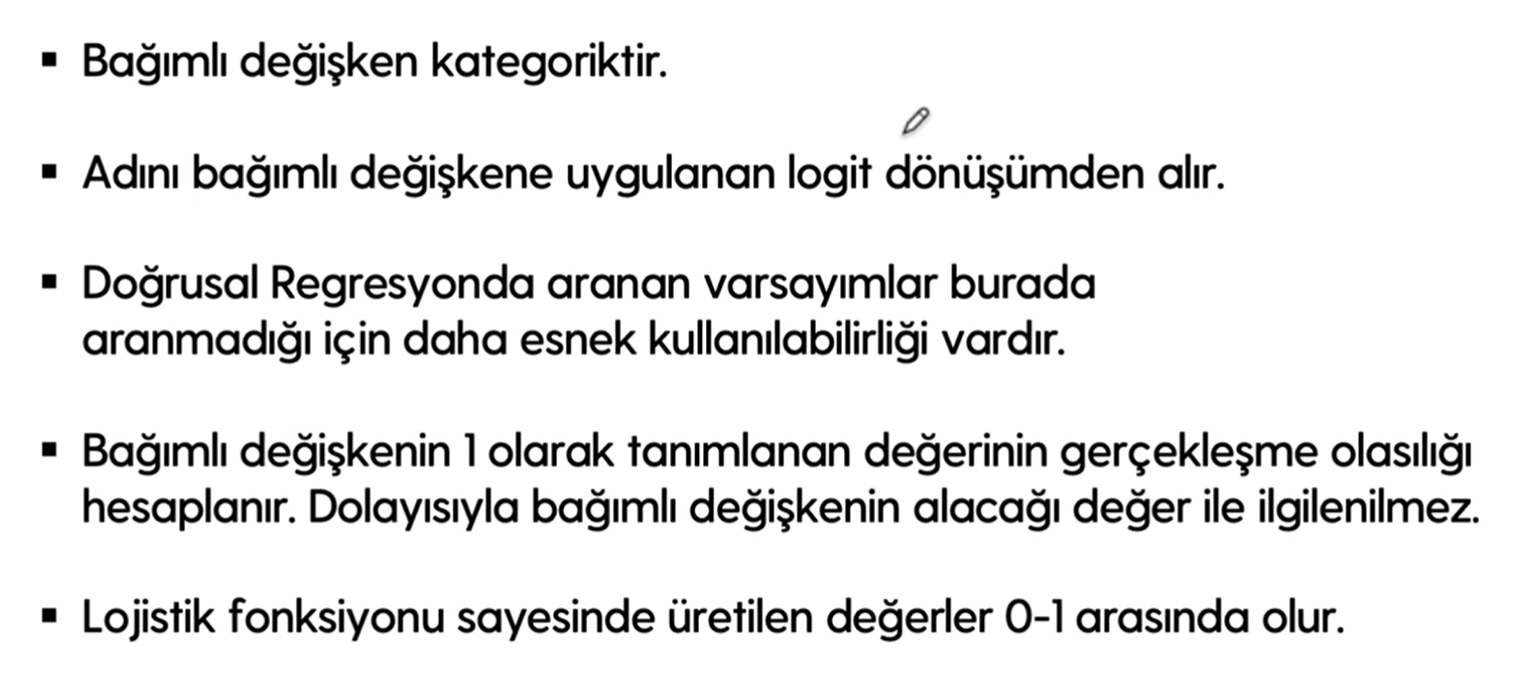

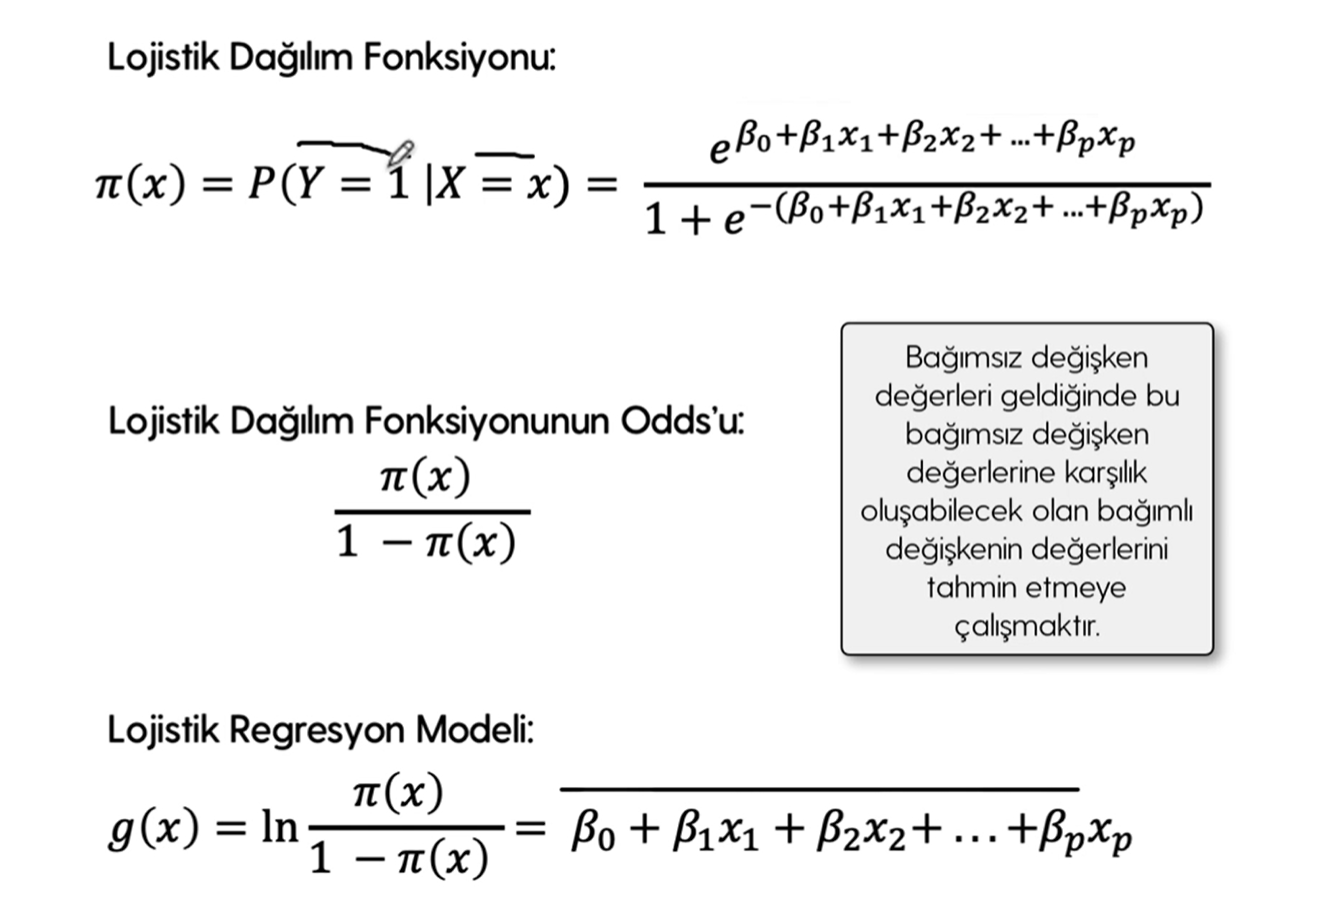

* Bağımsız değişken değerleri yerine girildiğinde yani bağımsız değişkenler değerlerini aldığında bağımlı değişkenin 1 olması olasılığı ile ilgileniyoruz. Aşağıda ise bu kat sayıların nasıl bulunabileceği formül ile gösterilmiştir.

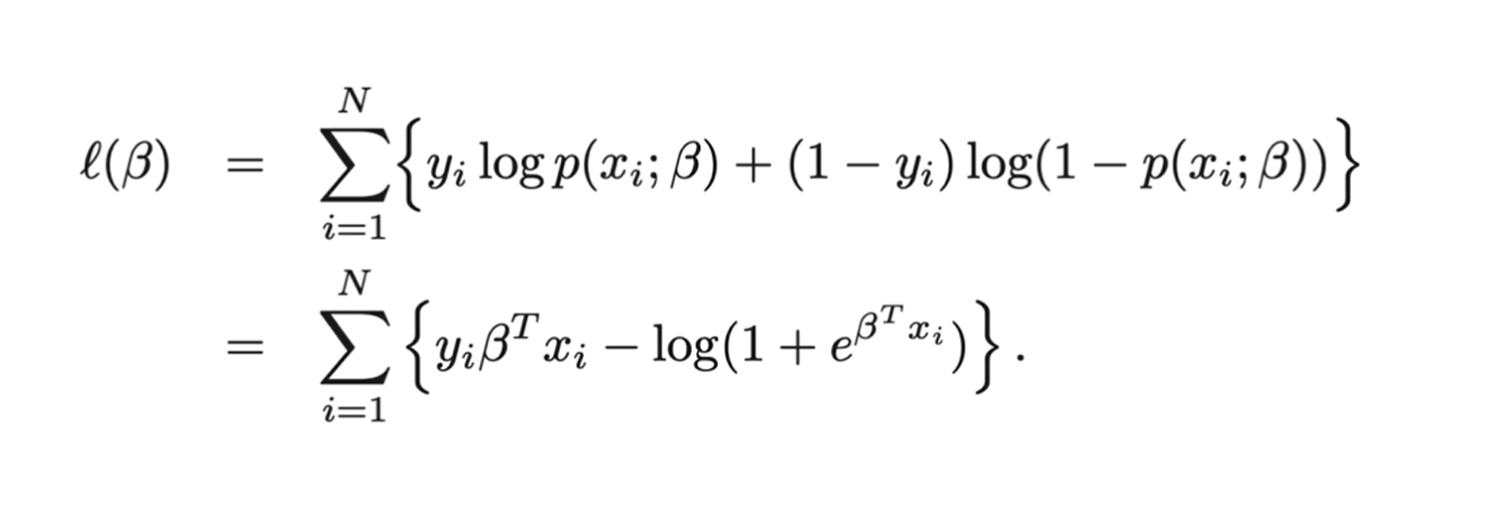

* Regresyon problemlerinde gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin toplamını minimum yapacak şekilde beta kat sayılarına erişmeye çalışıyorduk. Burada ise doğru kat sayılara erişebilmek adına benzer yöntemler kullanıyoruz. Yukarıdaki "l" ifadesi logistic'i ifade etmektedir. Formülümüz yine elimizdeki gerçek değerler ile tahmin edilen değerler arasındaki bu farklara göre betaların bulunmasına dayanmaktadır.
 
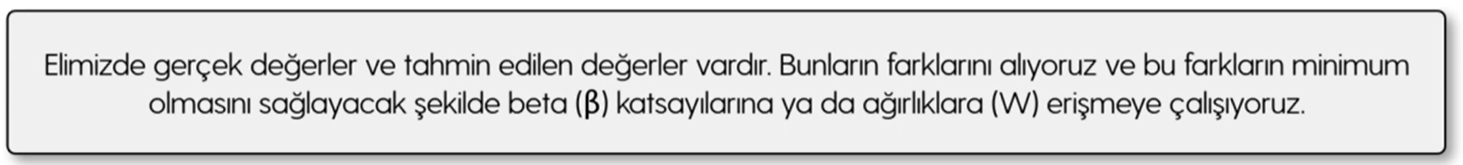

### Lojistik Regresyon Model ve Tahmini

In [5]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [7]:
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [10]:
log_model = LogisticRegression(solver = "liblinear").fit(X,y)

In [11]:
log_model.intercept_

array([-5.89244725])

In [12]:
log_model.coef_

array([[ 1.17062307e-01,  2.83894485e-02, -1.68884383e-02,
         7.55570124e-04, -6.42898509e-04,  5.97750887e-02,
         6.77485486e-01,  7.24141933e-03]])

In [13]:
log_model.predict(X)[0:10] # Tahmin edilen değerler

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [14]:
y[0:10] # Gerçek değerler yani verideki

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [15]:
# model başarısını test etme
y_pred = log_model.predict(X)

In [16]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

* Accuracy score = başarılı yaptığımız işler / tüm durum

In [17]:
accuracy_score(y, y_pred)

0.7747395833333334

In [18]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [19]:
log_model.predict_proba(X)[0:10]

array([[0.35038673, 0.64961327],
       [0.9170336 , 0.0829664 ],
       [0.22474676, 0.77525324],
       [0.92140021, 0.07859979],
       [0.16726061, 0.83273939],
       [0.79899818, 0.20100182],
       [0.88020586, 0.11979414],
       [0.2781198 , 0.7218802 ],
       [0.3205832 , 0.6794168 ],
       [0.92275236, 0.07724764]])

* "predict_proba" methodu bize her bir sınıf için olasılık değerlerini döndürür. Örneğin, ikili (binary) bir sınıflandırma probleminde, her bir örnek için iki olasılık değeri döner: birinci sınıfa ait olma olasılığı ve ikinci sınıfa ait olma olasılığı. Yani bizim predict ile ekranda gördüğümüz her bir değerin aslında arka planda olan hali şeklinde düşünebiliriz. 

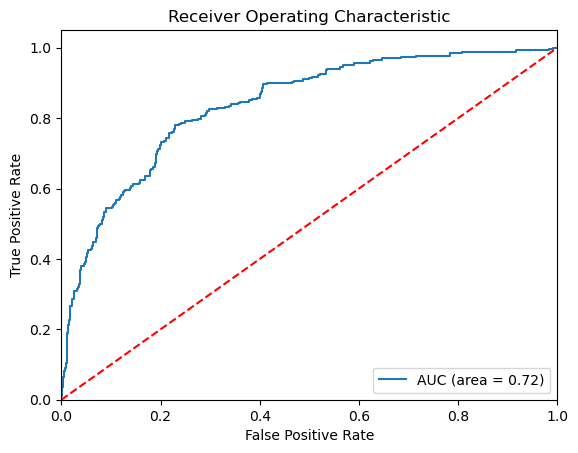

In [20]:
# ROC eğrisi oluşturma kodu:

logit_roc_auc = roc_auc_score(y, log_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.savefig("Log_ROC") # Bu resmi png olarak kaydetmeye yarıyor
plt.show()

### Lojistik Regresyon Model Tuning (Doğrulama)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [22]:
log_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [23]:
y_pred = log_model.predict(X_test)

In [24]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [25]:
cross_val_score(log_model, X_test, y_test, cv = 10).mean()

0.7704710144927536

# K En Yakın Komşu (KNN)

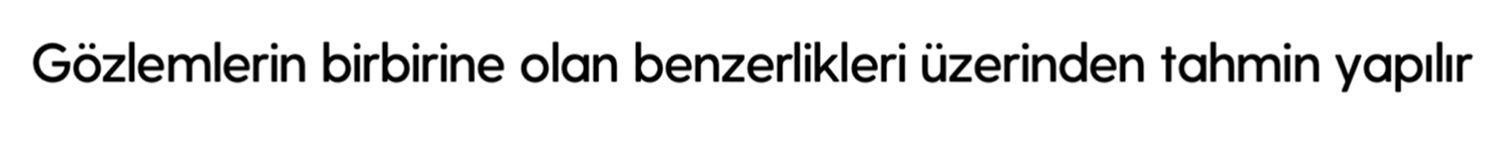

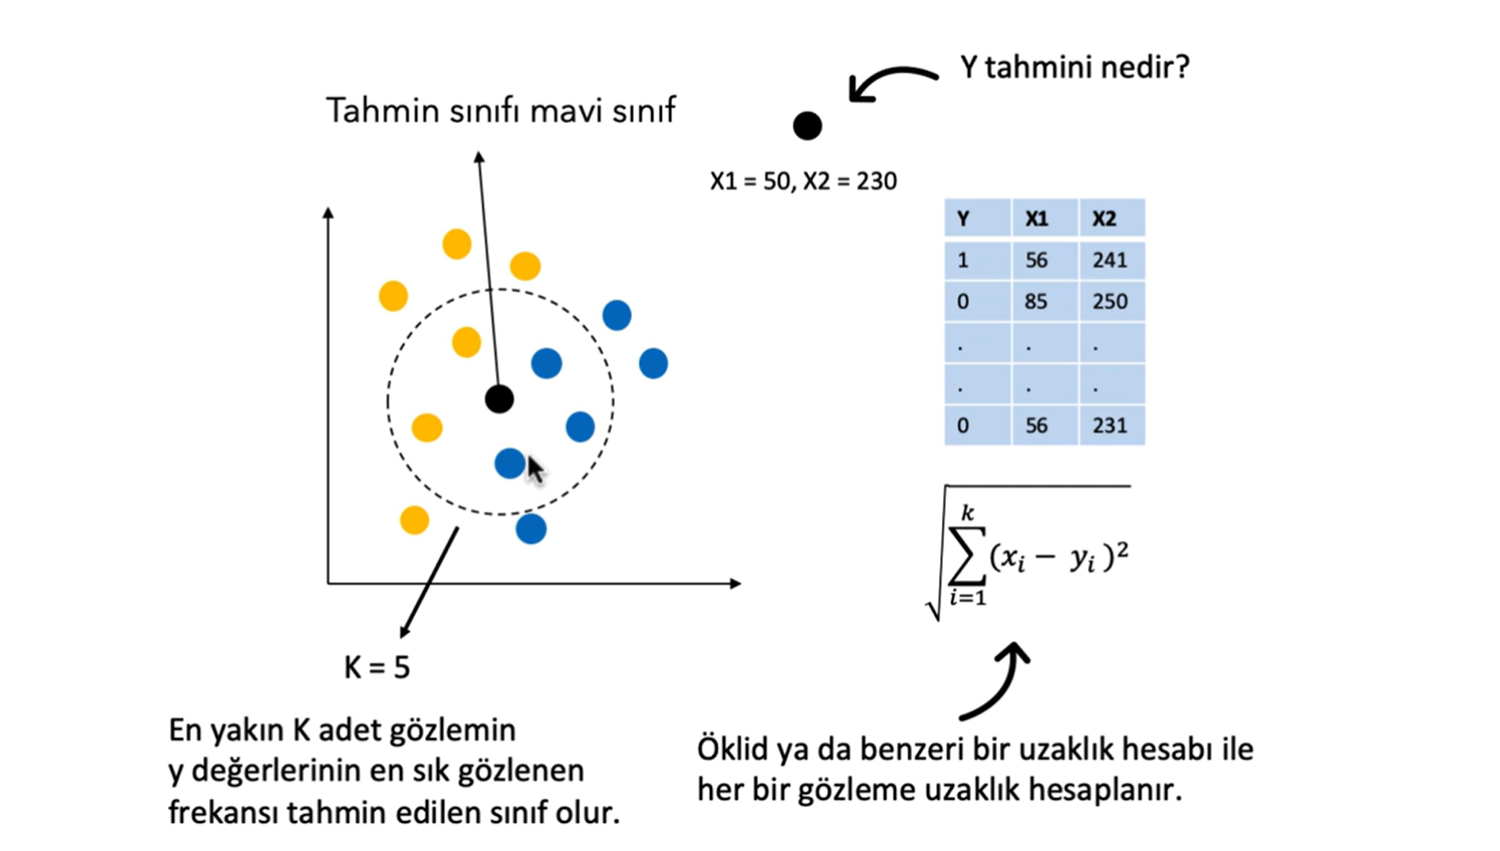

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

### K En Yakın Komşu Model ve Tahmin

In [27]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [28]:
knn_model

KNeighborsClassifier()

In [29]:
y_pred = knn_model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### K En Yakın Komşu Model Tuning

In [32]:
knn = KNeighborsClassifier()

In [33]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [34]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [35]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [36]:
knn_cv_model.best_score_

0.748637316561845

In [37]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [38]:
# Final model

knn_tuned = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)

In [39]:
y_pred = knn_tuned.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.7142857142857143

In [41]:
knn_tuned.score(X_test, y_test)

0.7142857142857143

* Yukarıdaki "knn_tuned.score" ile de accuracy score'a ulaşabiliriz. Yani bu şekilde yaparsak y_pred işlemine ihtiyacımız kalmadan yapmış oluyoruz.

# Destek Vektör Makineleri

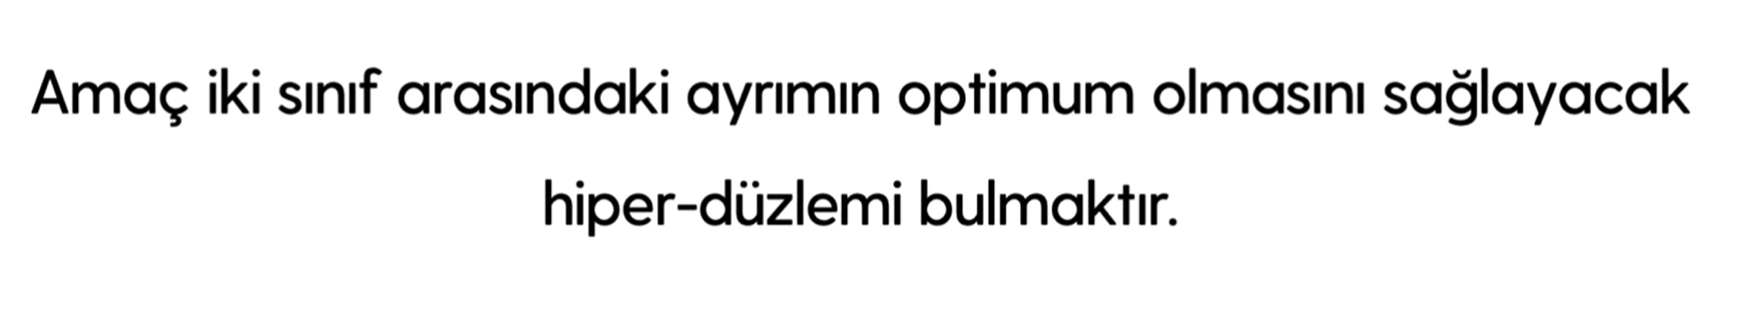

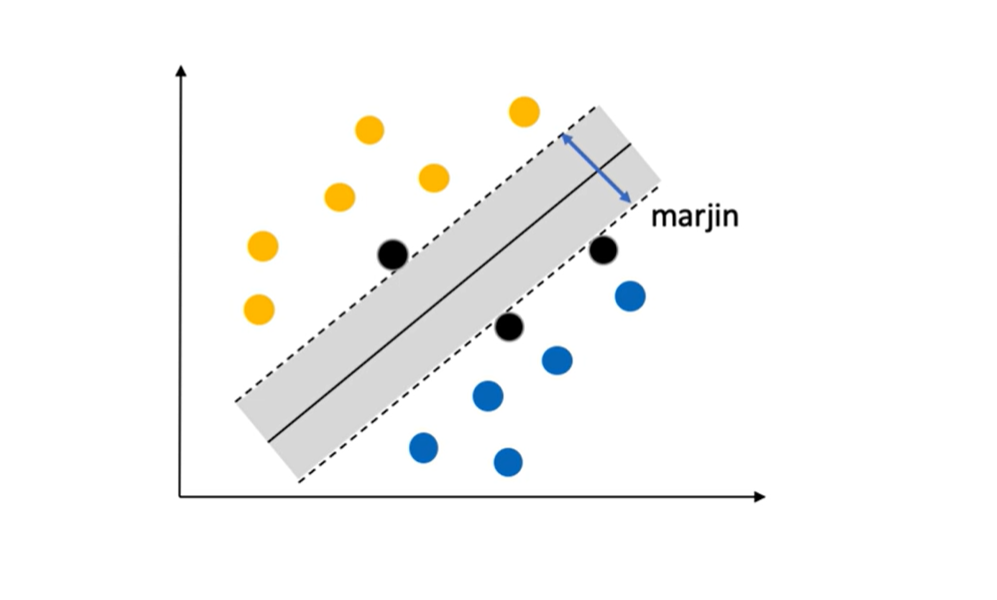

* Belirtilen iki sınıf arasındaki marjinin hesaplanabilmesi için hard-soft ismi verilen hesaplamalar vardır. Yani tolerasnlı ya da tolerasnsız olarak yukarıdaki siyah noktalara gösterilen ilgi ya ilgisizliği ifade eden seviyeli bir kavram söz konusudur. Bizim amacımız bu iki sınıfı birbirinden ayırmak bu ayırma işlemini SVM(Destek Vektör Makineleri) aracılığı ile yapıyorsak bir doğru ve etrafında maksimum marjini sağlamaya çalışarak yapıyor olmamızdır. 

### Destek Vektör Makineleri Model ve Tahmini


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [43]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)  # kernel default olarak "rbf" fakat biz burda linear olarak ayarladık.

* Linear ayarlama nedenimiz ise bizim doğrusal bir ayrım yapmayı hedeflememizden kaynaklanmaktadır.
* "radial basis function" = rbf açılımı 

In [44]:
svm_model

SVC(kernel='linear')

In [45]:
y_pred = svm_model.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.7445887445887446

### Destek Vektör Makineleri Model Tuning

In [47]:
svm = SVC()

In [48]:
svm_params = {"C": np.arange(1, 10), "kernel": ["linear", "rbf"]}

In [49]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [50]:
svm_cv_model.best_score_

0.7839044652128765

In [51]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [52]:
# Final Model
svm_tuned = SVC(C = 2, kernel = "linear").fit(X_train, y_train)

In [53]:
y_pred = svm_tuned.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.7445887445887446

### Yapay Sinir Ağları Model ve Tahmin

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

* multilayer perceptron classifier(mlpc) = çok katmanlı algılayıcı sınıflandırıcı

In [56]:
mlpc_model = MLPClassifier().fit(X_train, y_train)

In [57]:
mlpc_model.coefs_

[array([[ 1.63807198e-01, -3.22447687e-01,  3.48626197e-02,
         -9.64398114e-02,  6.84759524e-02,  1.46071072e-03,
         -2.16010520e-01,  1.39068730e-04,  1.29193201e-01,
          9.18434316e-02,  3.02681031e-01, -1.56965522e-01,
          1.14242295e-02, -2.10576402e-01, -1.58943823e-01,
          1.54721034e-01, -9.10771196e-02,  1.57467857e-01,
         -2.26450891e-03,  7.35496846e-02,  2.10271522e-01,
         -4.29550912e-03, -2.27760499e-01,  1.90129854e-01,
          1.25081966e-01,  7.83082862e-03,  2.40810079e-02,
          1.67005095e-03, -1.57636762e-01, -1.82240068e-01,
         -1.27998862e-01, -1.94683070e-01,  1.27860140e-01,
          2.29466828e-02,  2.24457266e-01, -8.39954482e-02,
         -2.04756263e-03,  7.78787773e-02, -1.44906389e-01,
          2.26389800e-01, -3.67189737e-02,  1.85331882e-01,
         -1.97299204e-01,  4.50063996e-02,  1.91240814e-01,
         -4.51051683e-02, -2.15789065e-01, -8.61078527e-02,
         -1.15044290e-01, -1.90737602e-0

* "coefs" sinir ağının kullanmış olduğu farklı katmanlardaki farklı hücrelerin birbirleri ile ilişkileri ve benzeri durumlarını ifade eden katsayılardır.

In [58]:
?mlpc_model

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, defau

In [59]:
y_pred = mlpc_model.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.7272727272727273

### Yapay Sinir Ağları Model Tuning

In [61]:
mlpc = MLPClassifier(solver = "lbfgs", activation = "logistic")

In [62]:
mlpc_params = {"alpha": [1, 5, 0.1, 0.01, 0.03, 0.005, 0.0001], 
              "hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]}

In [63]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [64]:
mlpc_model

MLPClassifier()

In [65]:
mlpc_cv_model.best_params_

{'alpha': 5, 'hidden_layer_sizes': (100, 100)}

In [66]:
# Final Model
mlpc_tuned = MLPClassifier(alpha = 5, activation = "logistic",  hidden_layer_sizes =  (100, 100), solver = "lbfgs").fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [67]:
y_pred = mlpc_tuned.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.7489177489177489

In [69]:
# Standartlaştırma uygulanırsa;
scaler = StandardScaler()

In [70]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [71]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [72]:
mlpc = MLPClassifier(solver = "lbfgs", activation = "logistic")

In [73]:
mlpc_params = {"alpha": [1, 5, 0.1, 0.01, 0.03, 0.005, 0.0001], 
              "hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]}

In [74]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [75]:
mlpc_model

MLPClassifier()

In [76]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (100, 100)}

In [77]:
# Final Model
mlpc_tuned = MLPClassifier(alpha = 5, activation = "logistic",  hidden_layer_sizes =  (100, 100), solver = "lbfgs").fit(X_train, y_train)

In [78]:
y_pred = mlpc_tuned.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.7575757575757576

### Yapay Sinir Ağlarından çıkarılan sonuç:
* Yapay sinir ağlarında kullanılan activation fonksiyonu doğrusal problemler ve sınıflandırma problemleri için değişebilmektedir. Sınıflandırma problemleri için "logistic" fonksiyonuyla kullanmamız gerekmektedir. Eğer bir regresyon problemi kullanıyorsak ise bunu "relu" yöntemi ile kullanmamız gerekmektedir. Bununla beraber kullanmış olduğumuz gizli katman ve alpha hiperparametreleri ya da ağ mimarilerine ilişkin özellikleri de hiperparametre arama yöntemleri ile aramamız gerekmektedir. Son olarak da yapay sinir ağları homojen veri setleri üzerinde daha iyi çalıştığından dolayı kendisine bir standartlaştırma işlemi uygulanmasını sever bu yüzden yapılan standartlaştırma işlemi sayesinde sonuç doğruluğunun yükselmesine sebep olur. 

# Classification and Regression Tree (CART)

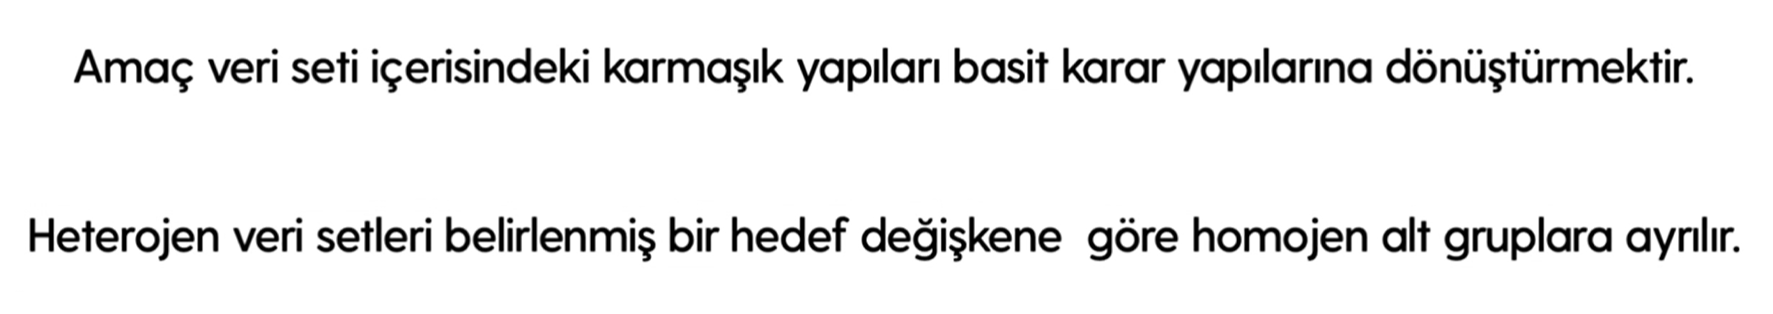

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

### CART Model ve Tahmin

In [81]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [82]:
cart_model

DecisionTreeClassifier()

In [83]:
y_pred = cart_model.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.6883116883116883

### CART Model Tuning

In [85]:
cart = DecisionTreeClassifier()

In [86]:
cart_params = {"max_depth": [1, 3, 5, 8, 10],
              "min_samples_split": [2, 3, 5, 10, 20, 50]}

In [87]:
cart_cv_model = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [88]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [89]:
# Final model
cart_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split = 20).fit(X_train, y_train)

In [90]:
y_pred = cart_tuned.predict(X_test)

In [91]:
accuracy_score(y_test, y_pred)

0.7532467532467533

# Bagging
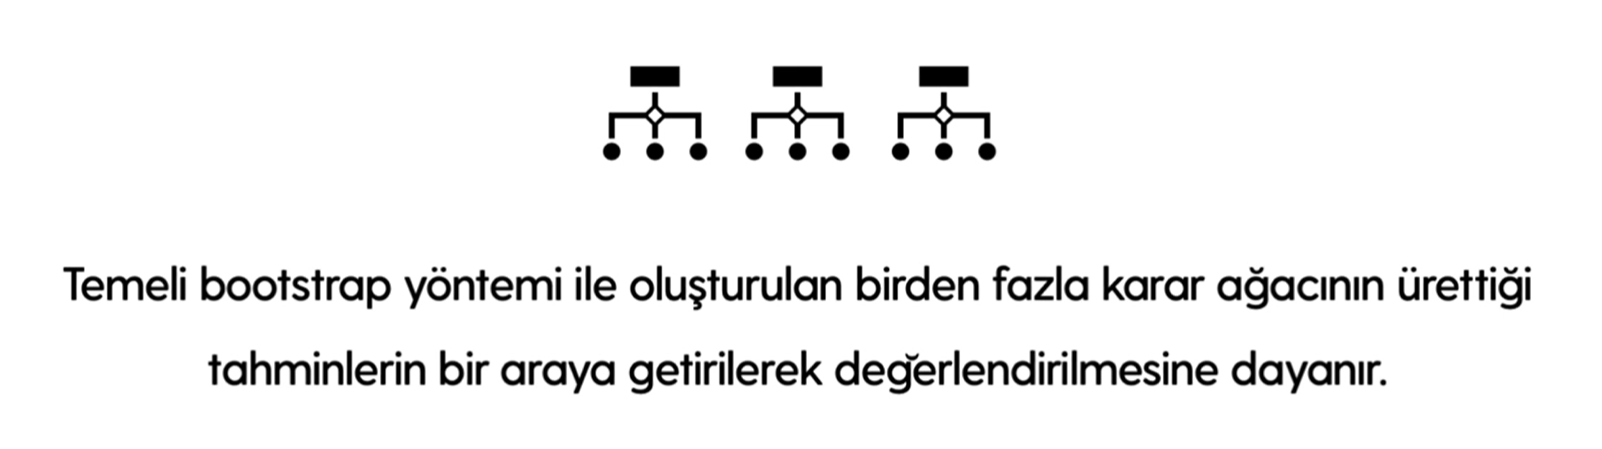

# Bagging Çalışma Prensibi
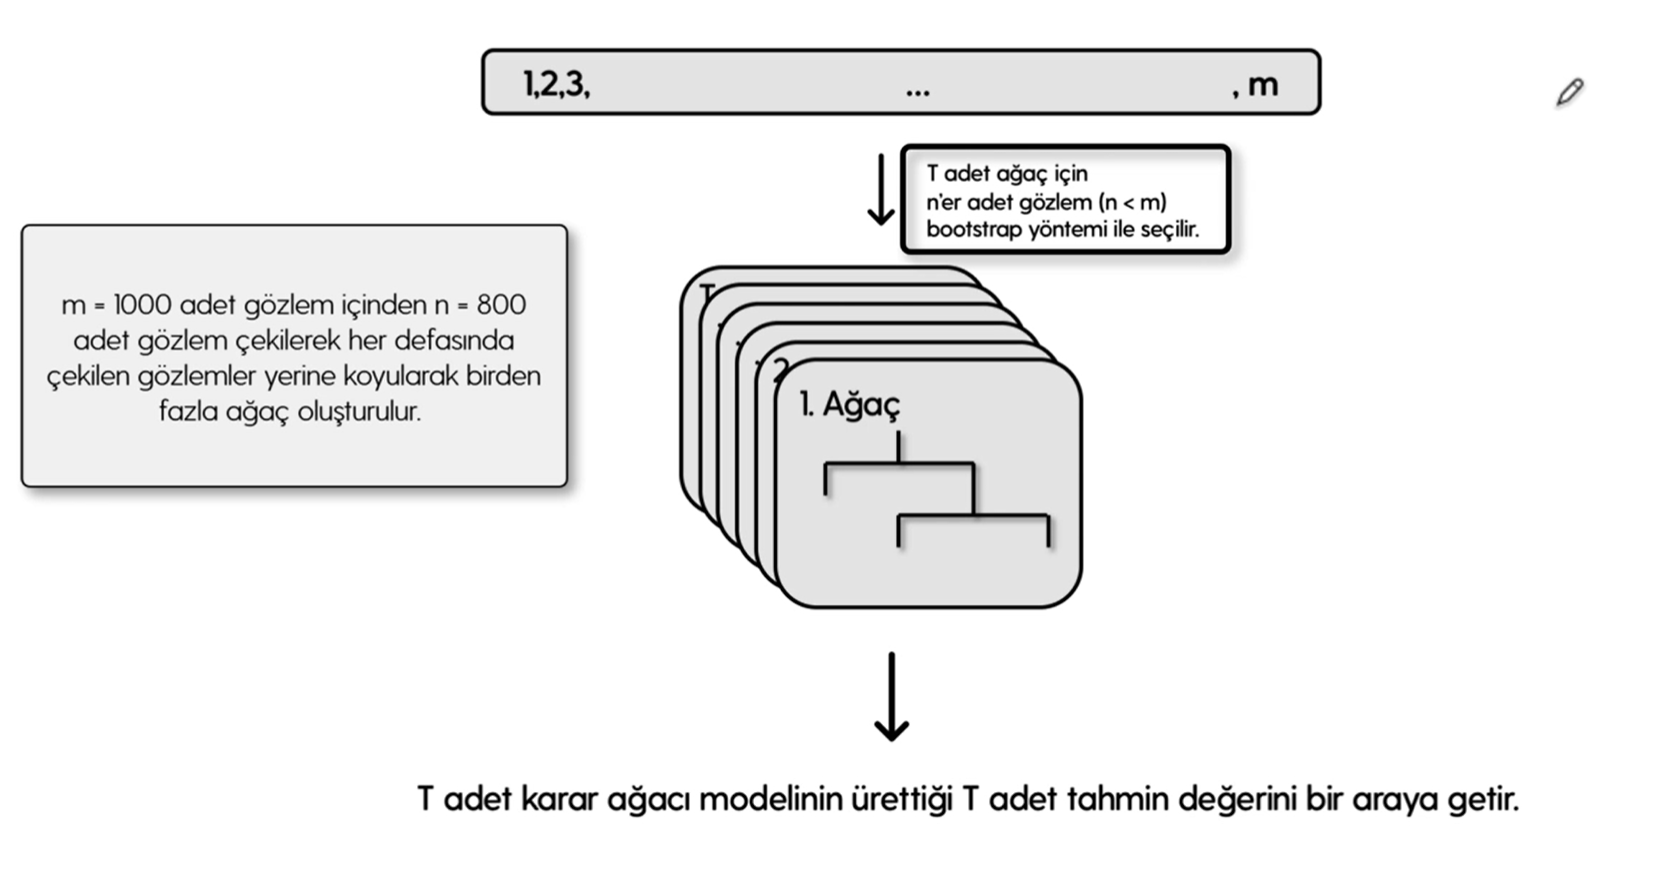
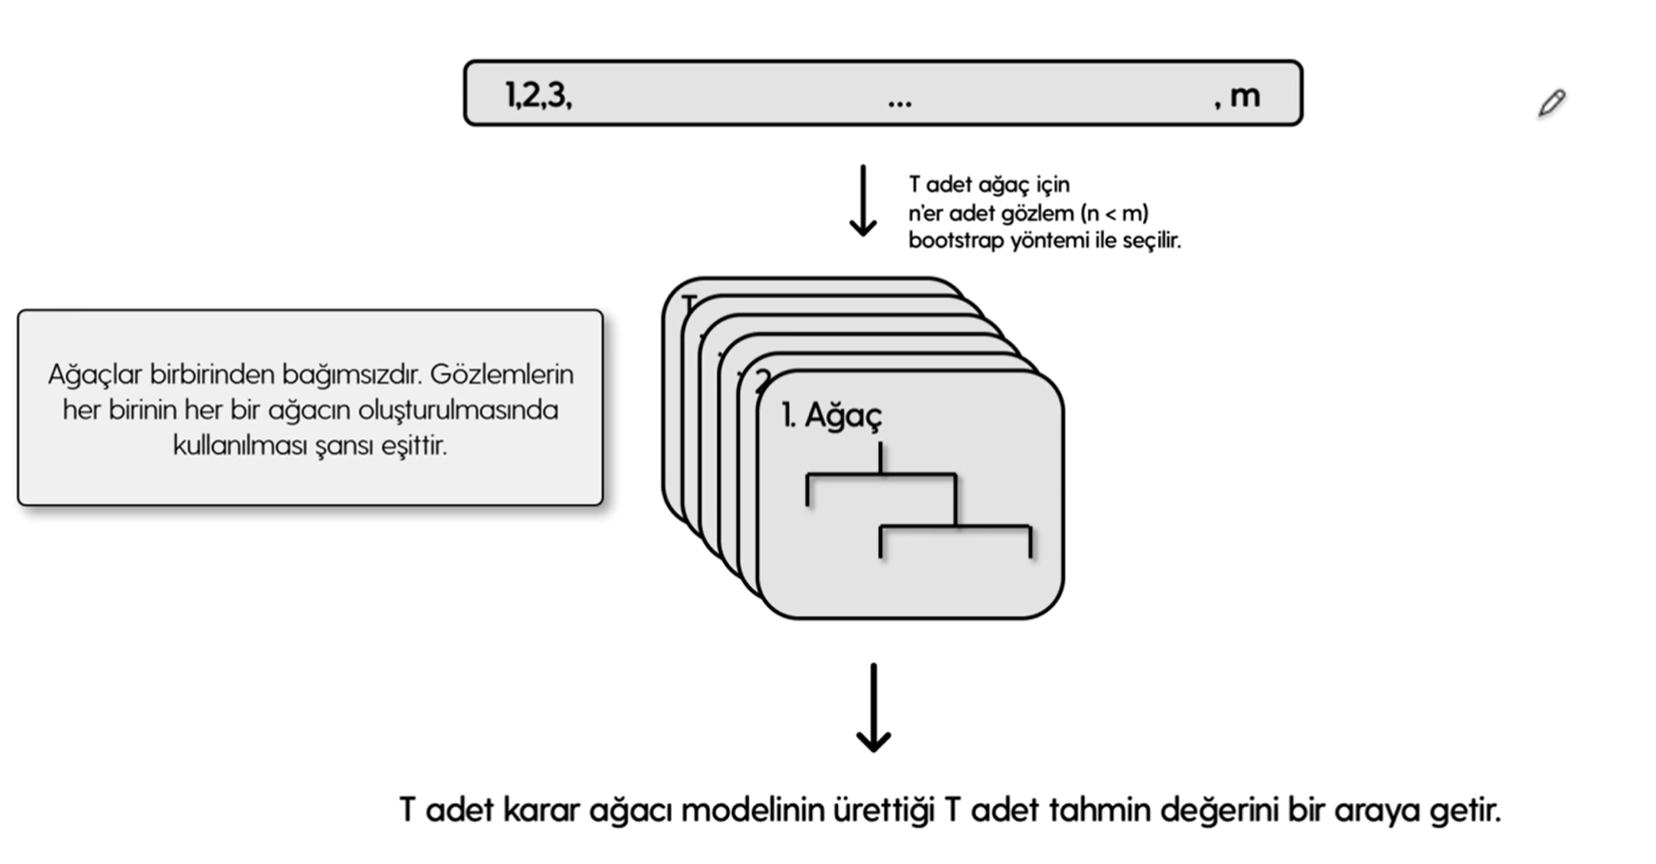
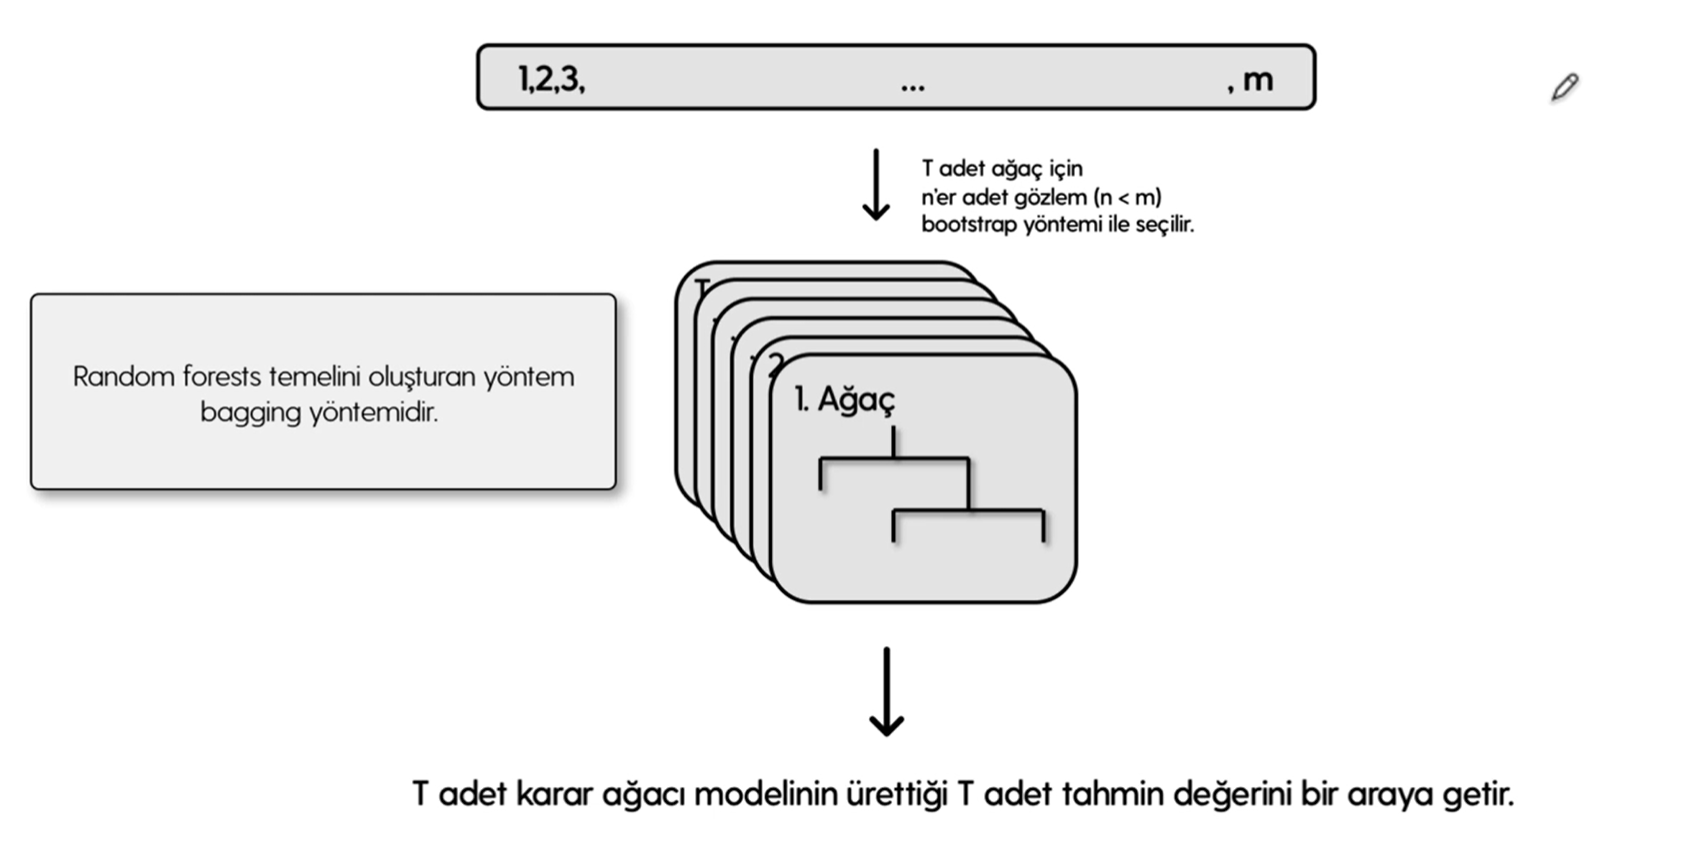
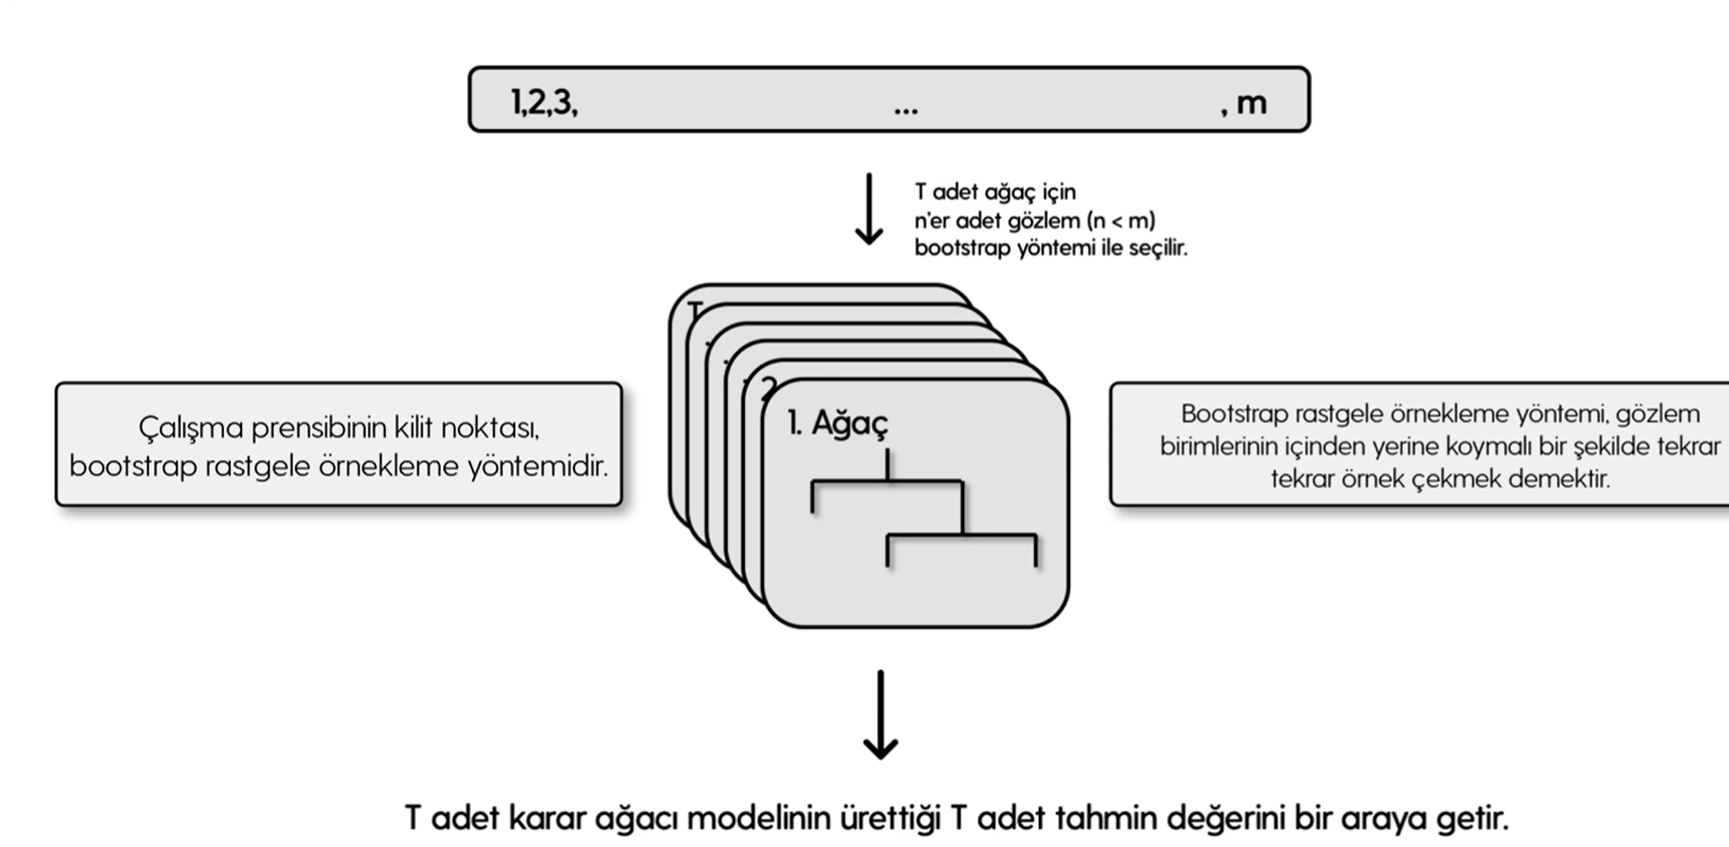

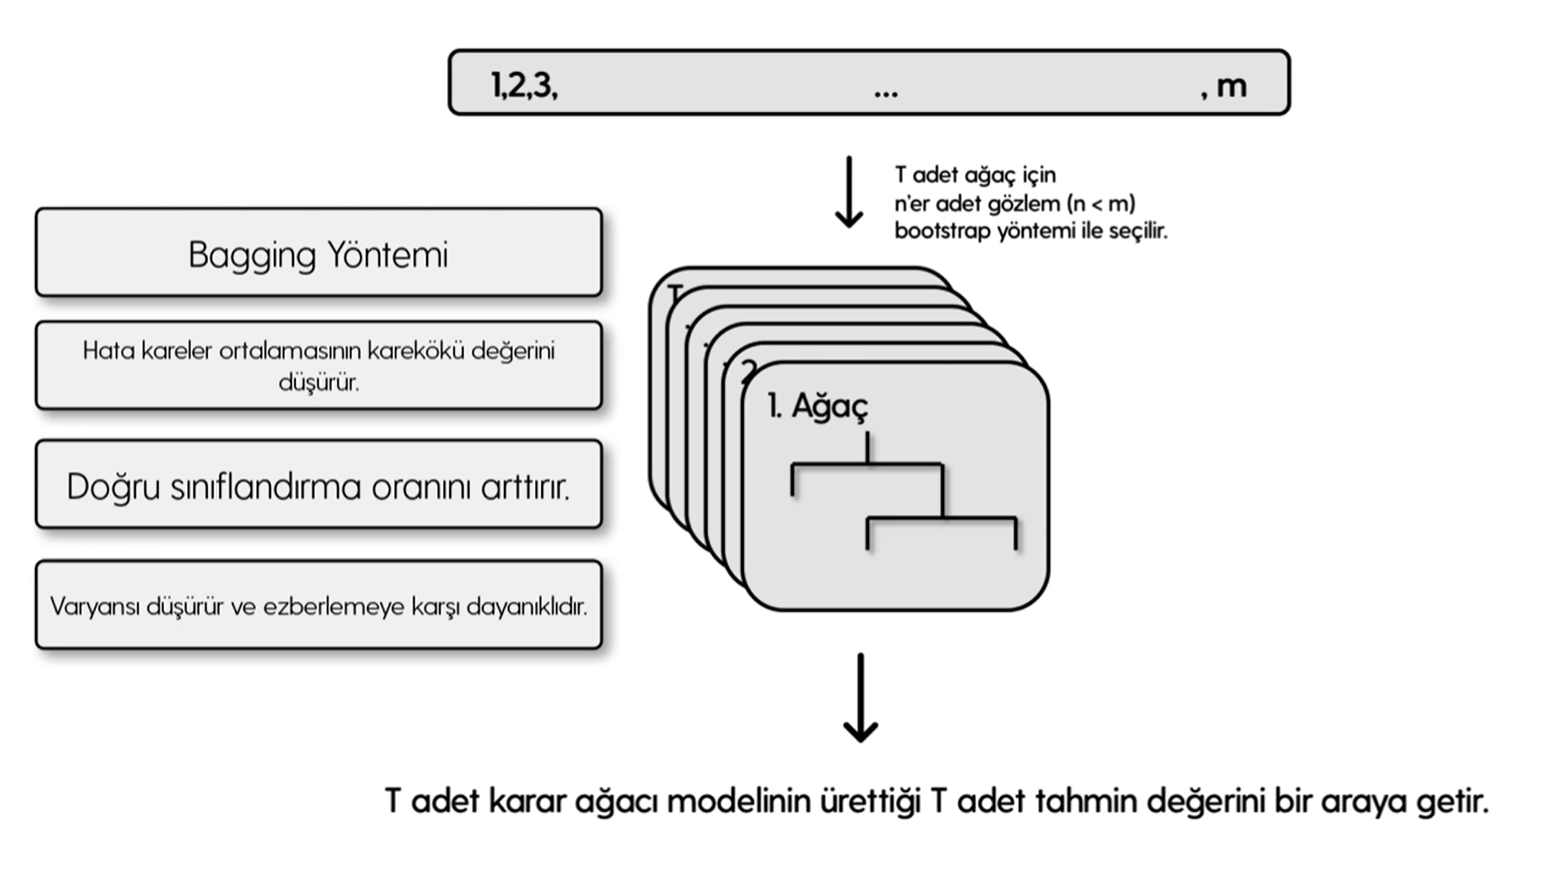

# Random Forest
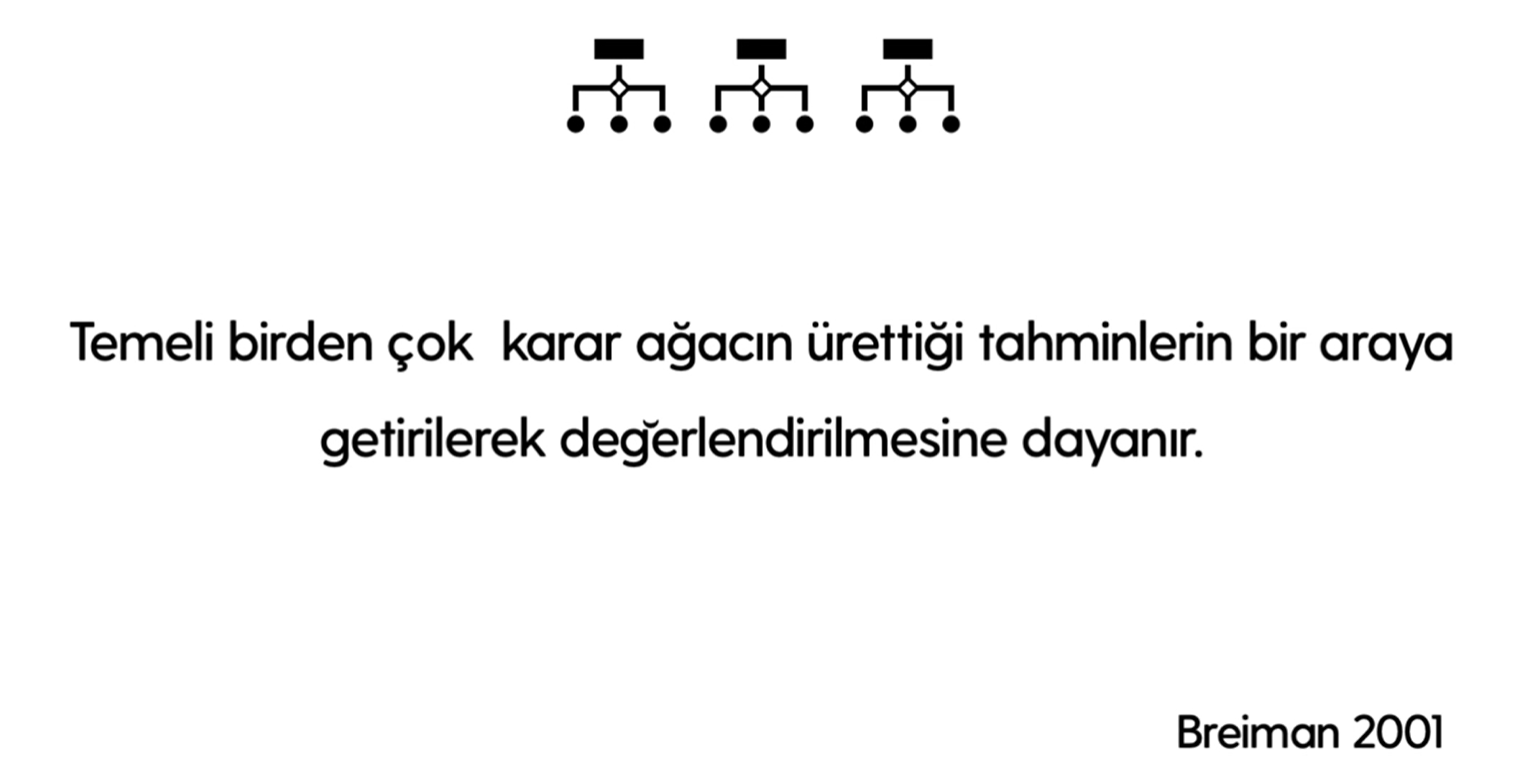

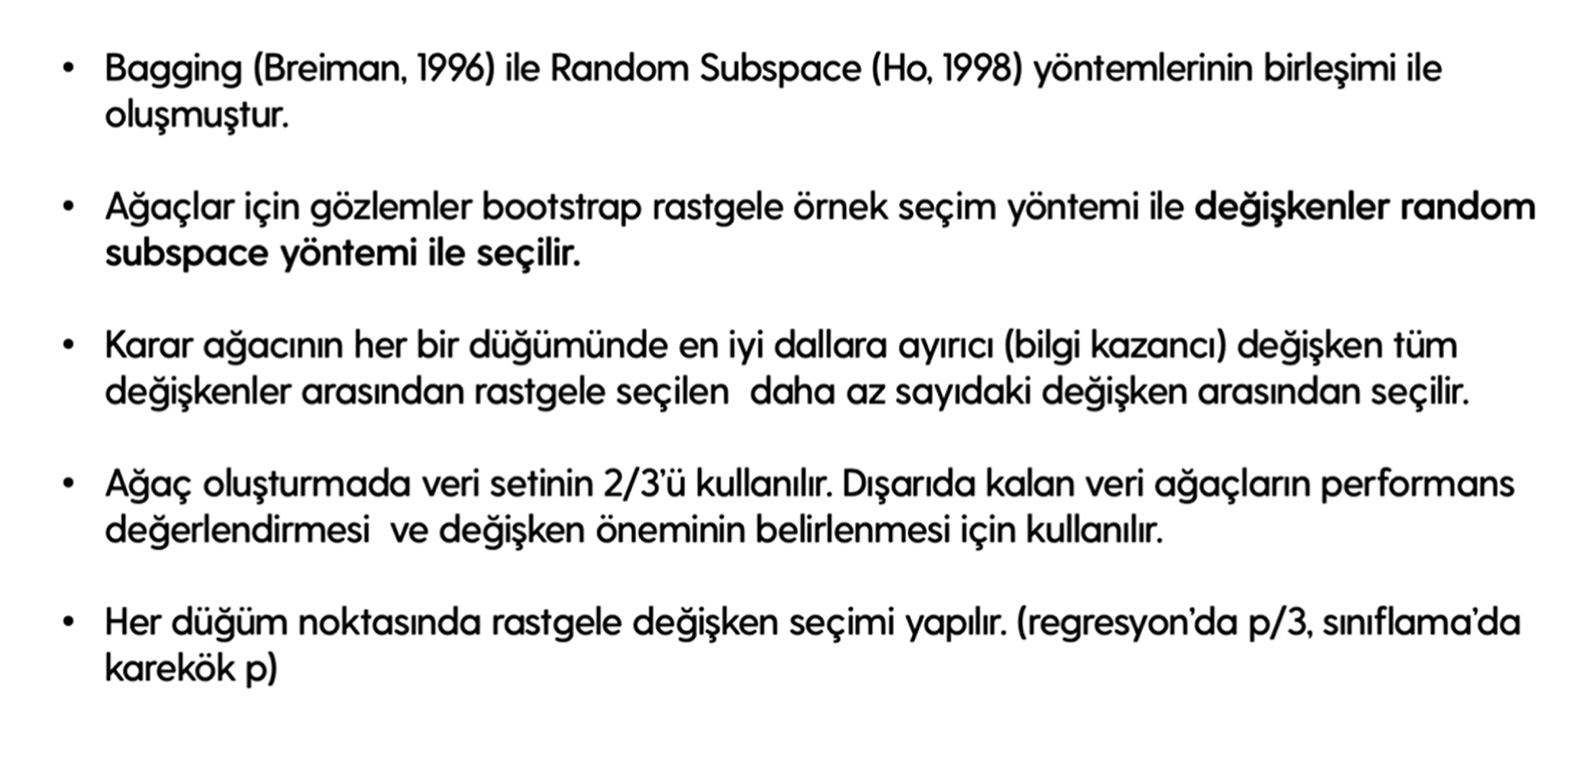

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

### Random Forests Model ve Tahmin

In [93]:
rf_model = RandomForestClassifier()

In [94]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
y_pred = rf_model.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.7402597402597403

### Random Forests Model Tuning

In [97]:
rf = RandomForestClassifier()

In [98]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number 

In [99]:
rf_params = {"n_estimators": [100, 200, 500, 1000],
            "max_features": [3, 5, 7, 8],
            "min_samples_split": [2, 5, 10, 20]}

In [100]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [101]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 5, 'n_estimators': 500}

In [102]:
# Final Model
rf_tuned = RandomForestClassifier(max_features = 5, min_samples_split = 10, n_estimators = 200).fit(X_train, y_train)

In [103]:
y_pred = rf_tuned.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred)

0.7489177489177489

### Değişken Önem Sıraları

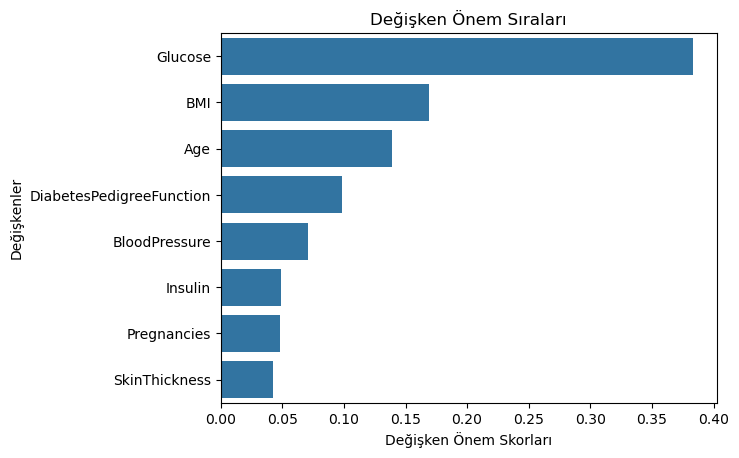

In [105]:
feature_imp = pd.Series(rf_tuned.feature_importances_, 
                         index = X_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Sıraları")
plt.show()

# Gradient Boosting Machines

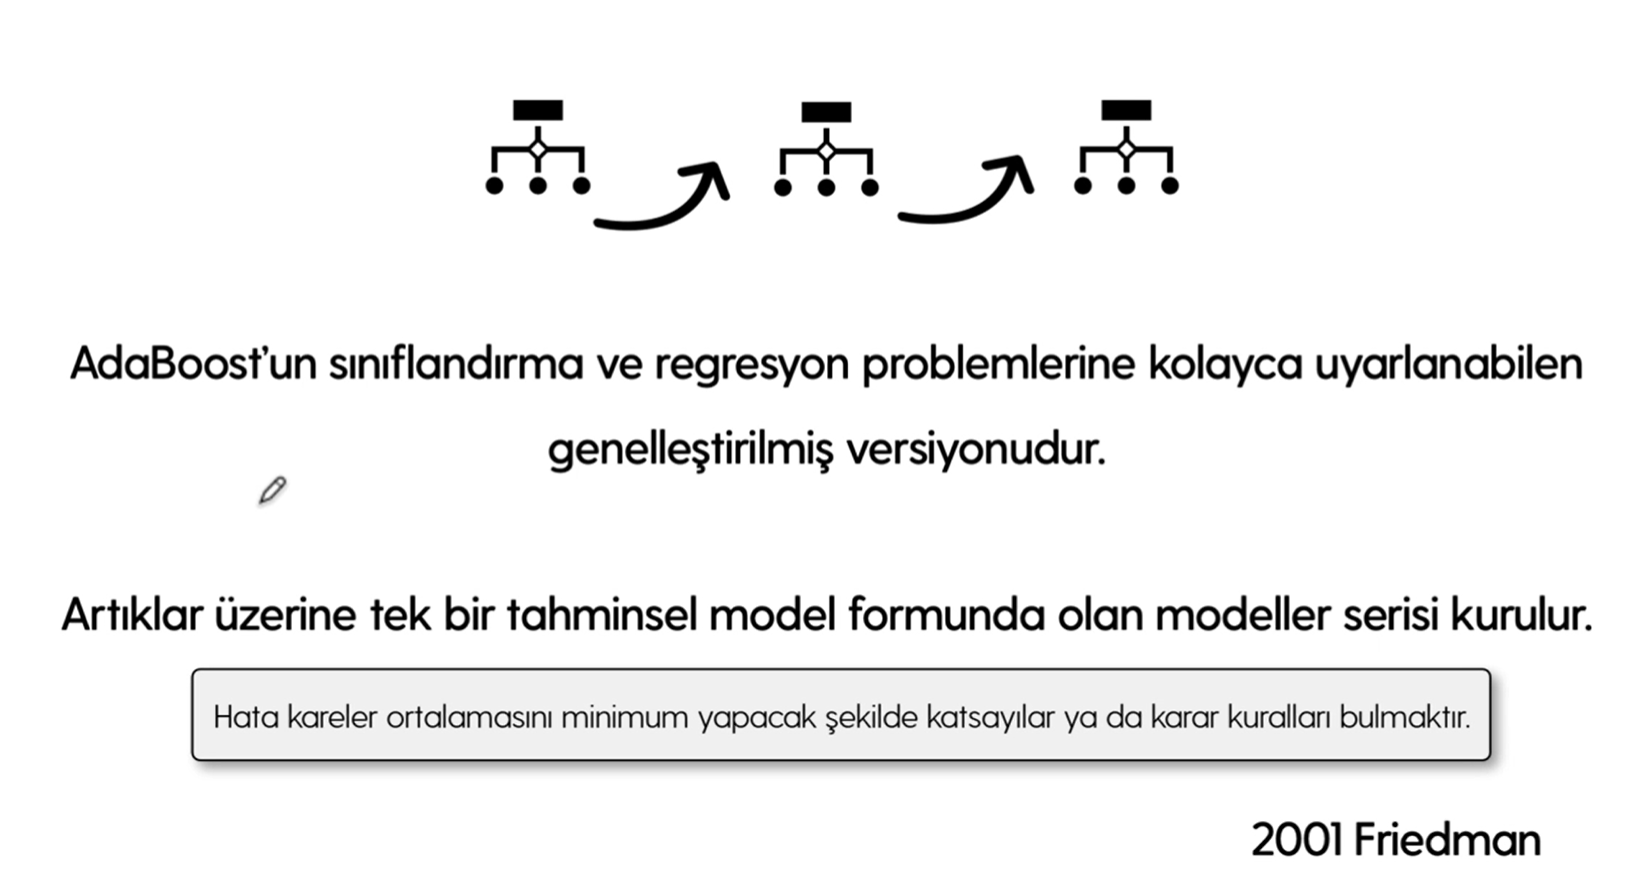

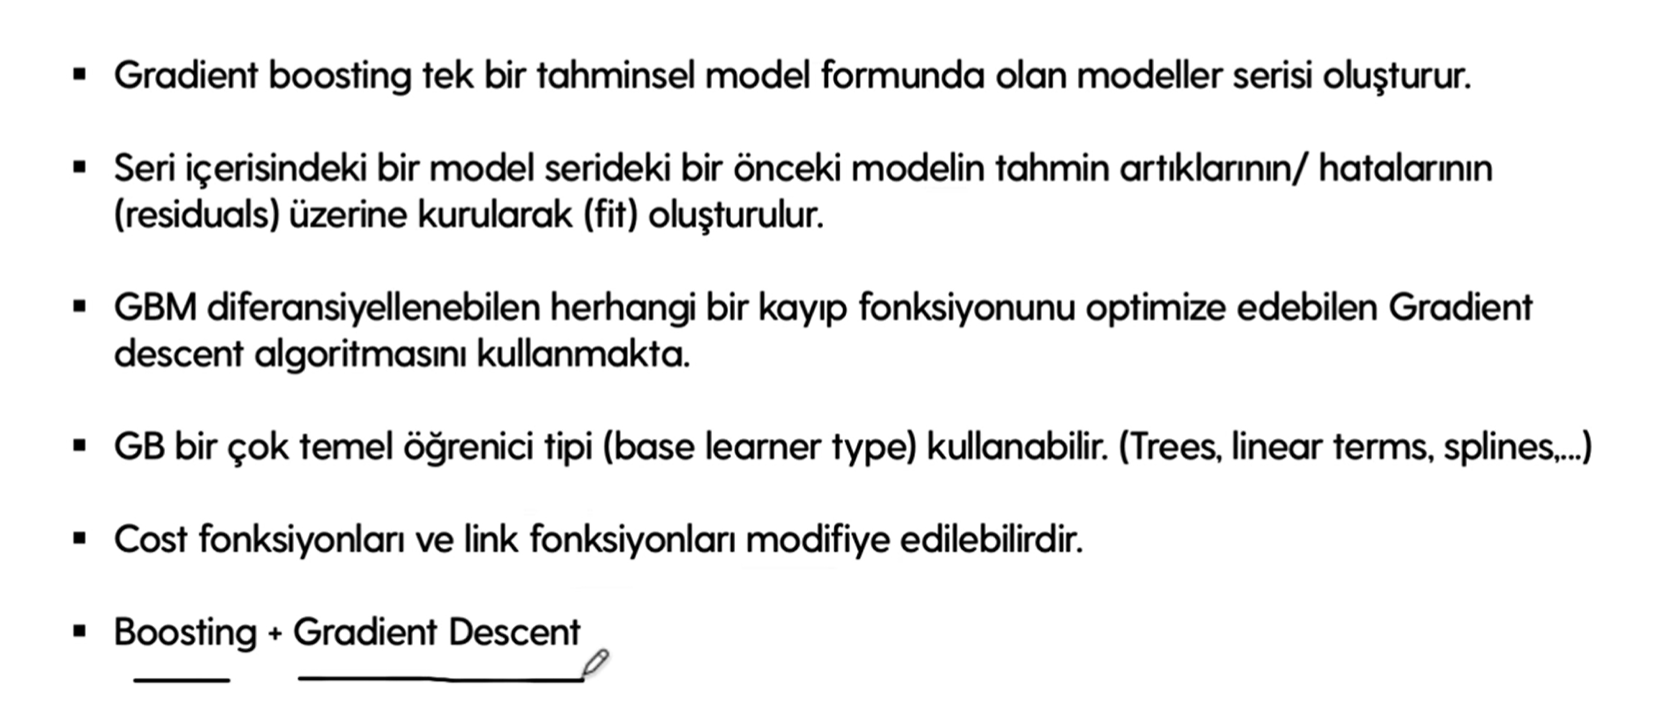

### Gradient Boosting Machines Model ve Tahmin

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [107]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [108]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`~sklearn.ensemble.HistGradientBoostingClassifier` is a much faster variant
of this algorithm for intermediate and large datasets (`n_samples >= 10_000`) and
supports monotonic constraints.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'log_loss', 'exponential'}, default='log_loss'
    The loss function to be optimized. 'log_loss' refers to bino

In [109]:
y_pred = gbm_model.predict(X_test)

In [110]:
accuracy_score(y_test, y_pred)

0.7532467532467533

### Gradient Boosting Machines Model Tuning

In [111]:
gbm = GradientBoostingClassifier()

In [112]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
             "n_estimators": [100, 300, 500, 1000],
             "max_depth": [2, 3, 5, 8]}

In [113]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [114]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [115]:
# Final Model
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 5, n_estimators = 300).fit(X_train, y_train)

In [116]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

### Değişken Önem Sıralaması

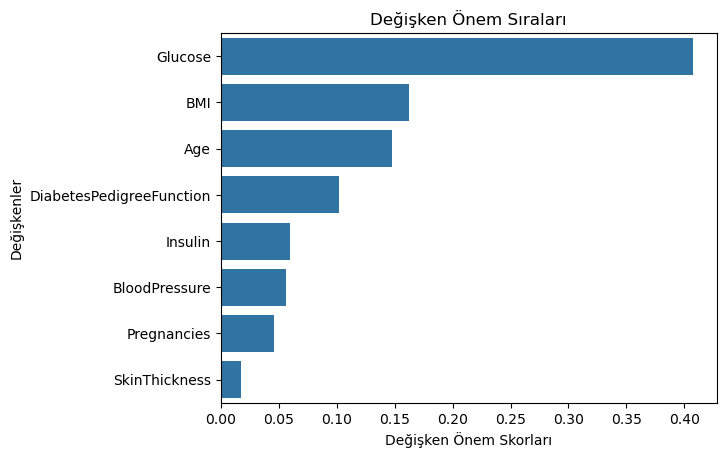

In [117]:
feature_imp = pd.Series(gbm_tuned.feature_importances_, 
                         index = X_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Sıraları")
plt.show()

# eXtreme Gradient Boosting(XGBoost)

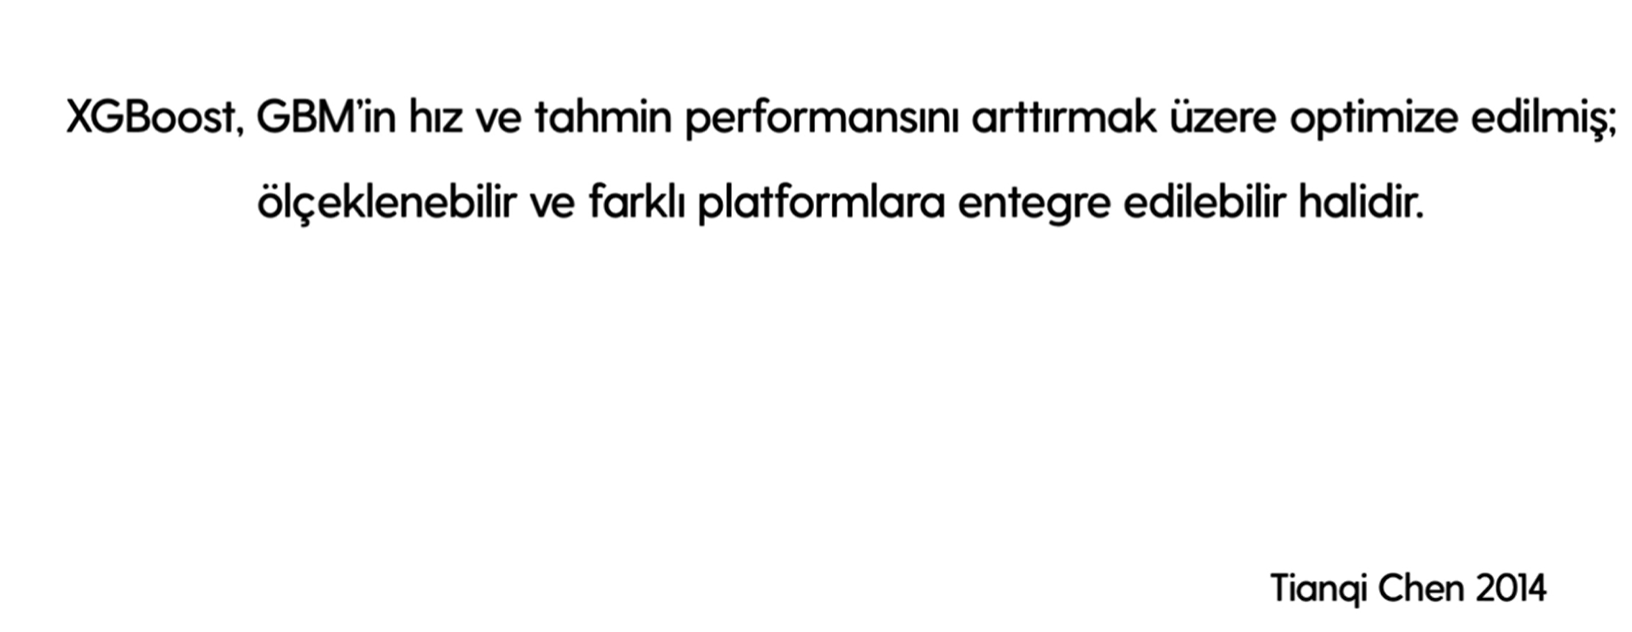

### XGBoost Model ve Tahmin

In [118]:
from xgboost import XGBClassifier

In [119]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [120]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: F

In [121]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

### XGBoost Model Tuning

In [122]:
xgb = XGBClassifier()

In [123]:
xgb_params = {"n_estimators": [100, 500, 1000],
              "subsample": [0.6, 0.8, 1],
             "max_depth": [3, 5, 7],
              "learning_rate": [0.1, 0.001, 0.01]}

In [124]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [125]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}

In [126]:
xgb_tuned = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 500, subsample = 0.8).fit(X_train, y_train)

In [127]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

### Değişken Önem Sıralaması

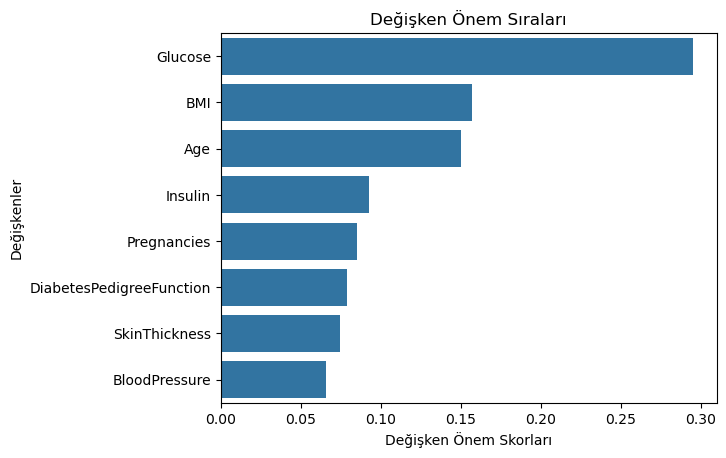

In [128]:
feature_imp = pd.Series(xgb_tuned.feature_importances_, 
                         index = X_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Sıraları")
plt.show()

# Light GBM
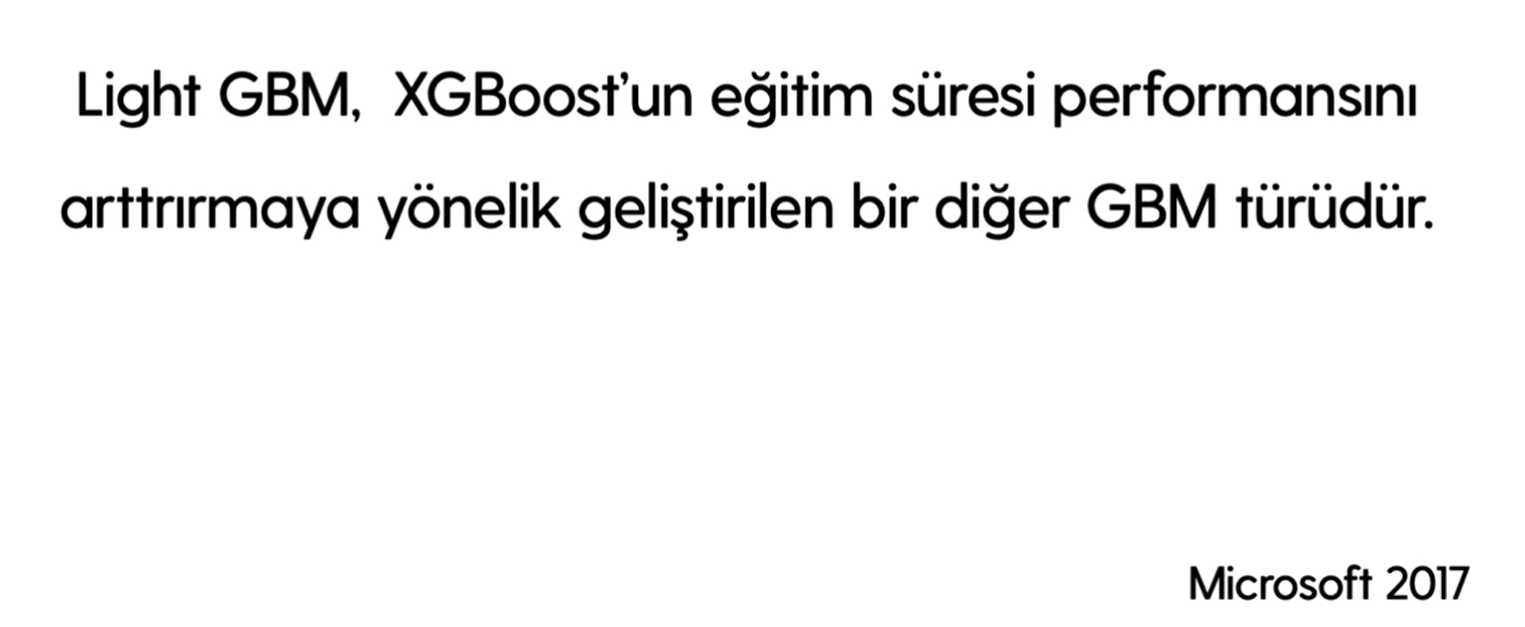

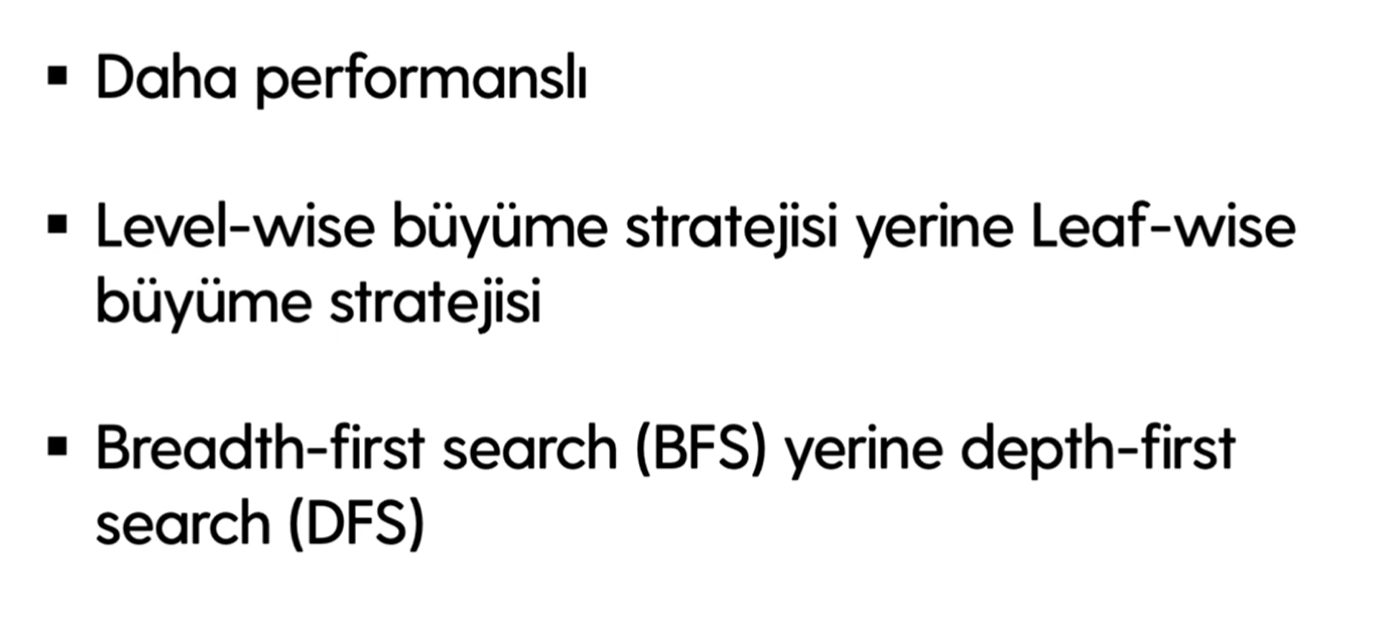

### Light GBM Model ve Tahmin

In [129]:
from lightgbm import LGBMClassifier

In [130]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [131]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

### Light GBM Model Tuning

In [132]:
lgbm = LGBMClassifier()

In [133]:
lgbm_params = {"n_estimators": [200, 500, 1000],
             "max_depth": [1, 2, 3, 5, 8],
              "learning_rate": [0.1, 0.001, 0.01]}

In [135]:
lgb_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [136]:
lgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

#### Final Model

In [137]:
lgbm_tuned = LGBMClassifier(learning_rate = 0.01, max_depth = 1, n_estimators = 500).fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [138]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

### Değişken Önem Sıralaması

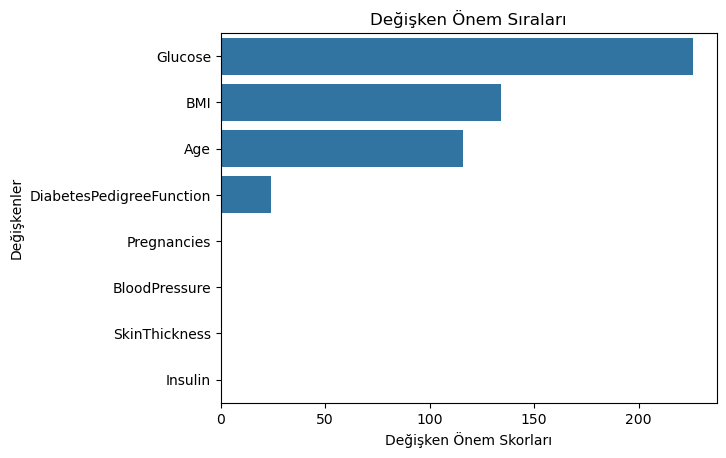

In [139]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_, 
                         index = X_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Sıraları")
plt.show()

# Category Boosting(CatBoost)

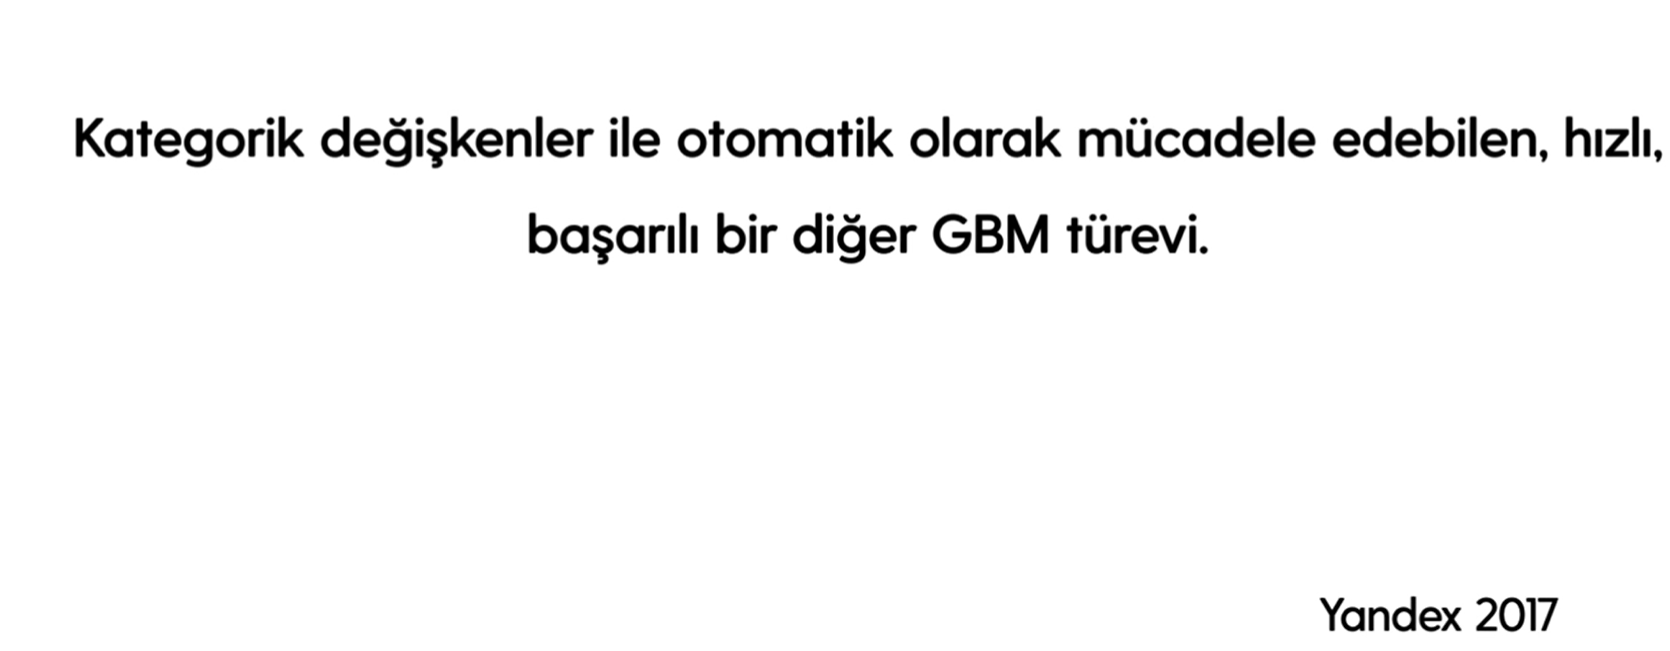

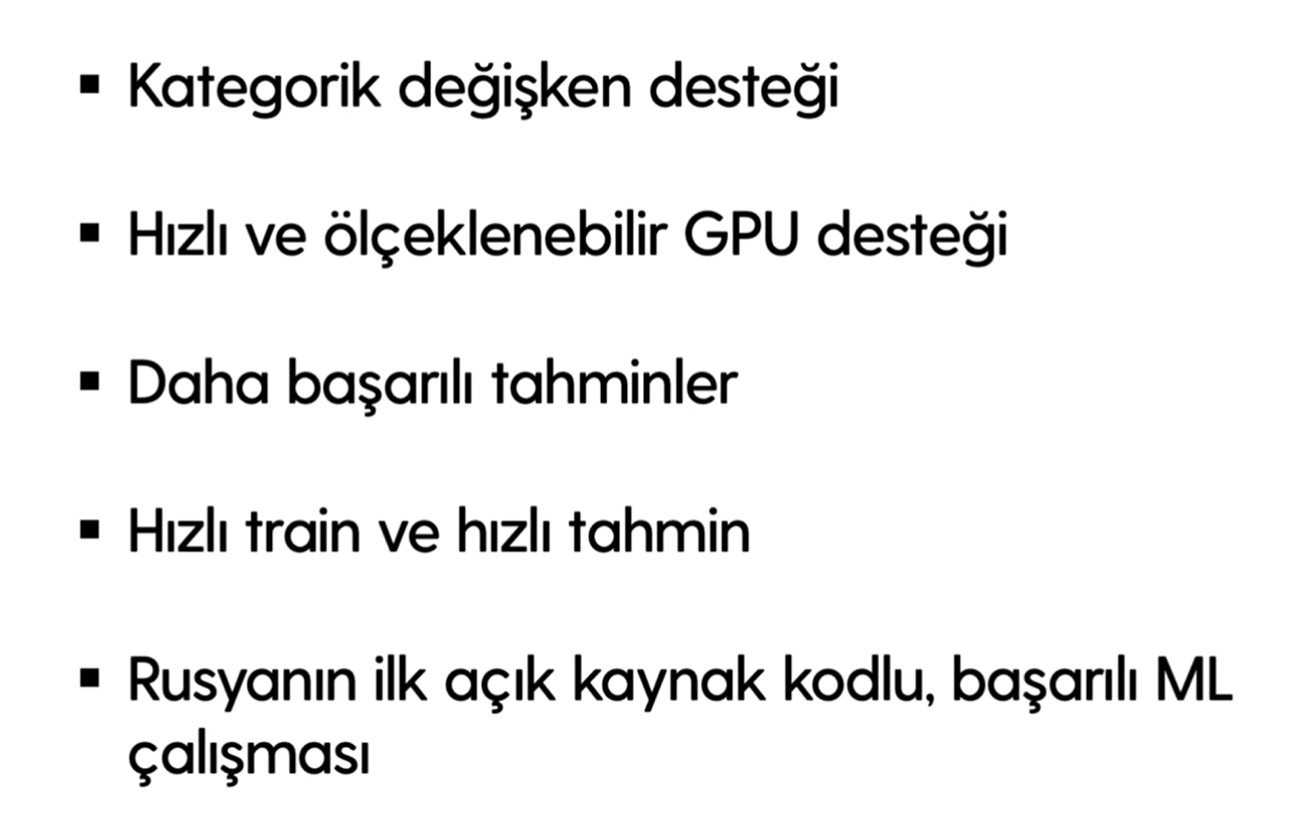

### CatBoost Model ve Tahmin

In [140]:
from catboost import CatBoostClassifier

In [141]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose = False)

* Yukarıda catboost learning rate uzun açıklamalı çıktısını istemezsen eğer fit içerisinde "verbose = False" methodu ile o çıktıyı gizleyebiliriz.

In [142]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [143]:
?catb_model

Type:           CatBoostClassifier
String form:    <catboost.core.CatBoostClassifier object at 0x000001BD6406EBA0>
File:           c:\users\asus\anaconda3\lib\site-packages\catboost\core.py
Docstring:     
Implementation of the scikit-learn API for CatBoost classification.

Parameters
----------
iterations : int, [default=500]
    Max count of trees.
    range: [1,+inf)
learning_rate : float, [default value is selected automatically for binary classification with other parameters set to default. In all other cases default is 0.03]
    Step size shrinkage used in update to prevents overfitting.
    range: (0,1]
depth : int, [default=6]
    Depth of a tree. All trees are the same depth.
    range: [1,16]
l2_leaf_reg : float, [default=3.0]
    Coefficient at the L2 regularization term of the cost function.
    range: [0,+inf)
model_size_reg : float, [default=None]
    Model size regularization coefficient.
    range: [0,+inf)
rsm : float, [default=None]
    Subsample ratio of columns when

* https://catboost.ai/ catboost dokümanına bu siteden ulaşabiliriz. Sklearn sitesinde bulunmamaktadır.

### CatBoost Model Tuning

In [144]:
catb = CatBoostClassifier()

In [145]:
catb_params = {"iterations": [200, 500, 1000],
              "learning_rate": [0.01, 0.03, 0.1],
              "depth": [4, 5, 8]}

In [146]:
catb_cv_model = GridSearchCV(catb, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train, verbose = False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [147]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

#### Final Model

In [148]:
catb_tuned = CatBoostClassifier(depth = 8, iterations = 200, learning_rate = 0.01).fit(X_train, y_train, verbose = False)

In [149]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

### Değişken Önem Sıralaması

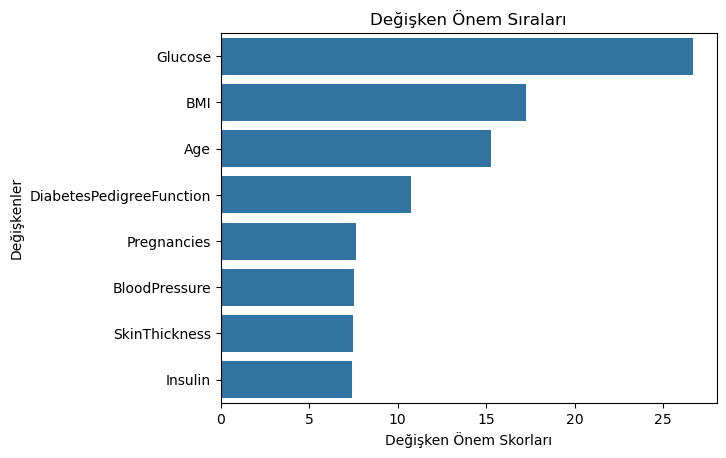

In [150]:
feature_imp = pd.Series(catb_tuned.feature_importances_, 
                         index = X_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Sıraları")
plt.show()

# Tüm Modellerin Karşılaştırılması

In [151]:
modeller = [knn_tuned, 
            log_model,
            svm_tuned,
            mlpc_tuned,
            cart_tuned,
            rf_tuned,
            gbm_tuned,
            catb_tuned,
            lgbm_tuned,
            xgb_tuned]

sonuc = []
sonuclar = pd.DataFrame(columns = ["Modeller", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk * 100]], columns = ["Modeller", "Accuracy"])
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


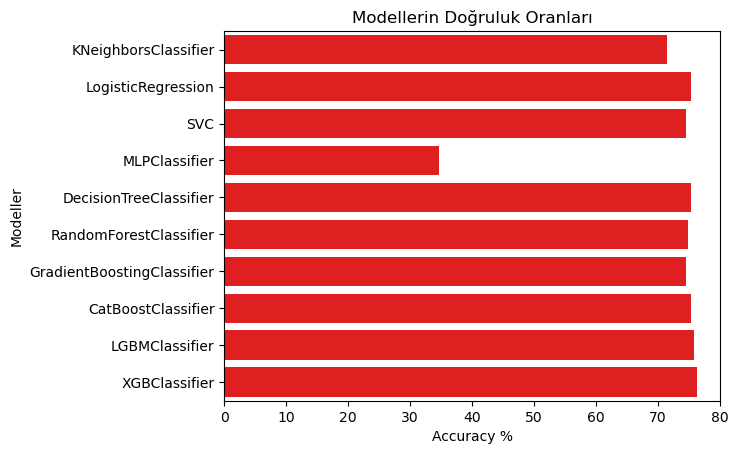

In [152]:
sns.barplot(x = "Accuracy", y = "Modeller", data = sonuclar, color = "red")
plt.xlabel("Accuracy %")
plt.title("Modellerin Doğruluk Oranları")
plt.show()

In [153]:
sonuclar

Modeller   Accuracy
0        KNeighborsClassifier  71.428571
1          LogisticRegression  75.324675
2                         SVC  74.458874
3               MLPClassifier  34.632035
4      DecisionTreeClassifier  75.324675
5      RandomForestClassifier  74.891775
6  GradientBoostingClassifier  74.458874
7          CatBoostClassifier  75.324675
8              LGBMClassifier  75.757576
9               XGBClassifier  76.190476

# **Done**